### setup

In [11]:
import pandas as pd

### ingest data

In [12]:
data = pd.read_parquet('../data/data.parquet', engine='pyarrow')
data.head(3)

,id,topic,question_title,question_content,best_answer
0,0,4,why doesn't an optical mouse work on a glass t...,or even on some surfaces?,Optical mice use an LED and a camera to rapidl...
1,1,5,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\...
2,2,2,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Wh...,Trans fats occur in manufactured foods during ...


has emojis

### eda

In [25]:
import re


emoji_pattern = re.compile("[\U00010000-\U0010FFFF]", flags=re.UNICODE)

data["has_emoji"] = data["question_title"].apply(lambda x: bool(emoji_pattern.search(x)))
data["has_emoji"].unique()

array([False])

In [26]:
data_copy = data.copy()

In [27]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                700000 non-null  int32 
 1   topic             700000 non-null  int64 
 2   question_title    700000 non-null  object
 3   question_content  700000 non-null  object
 4   best_answer       700000 non-null  object
 5   has_emoji         700000 non-null  bool  
dtypes: bool(1), int32(1), int64(1), object(3)
memory usage: 24.7+ MB


In [28]:
data_copy.duplicated().sum()

np.int64(0)

In [29]:
data_copy.isnull().sum()

id                  0
topic               0
question_title      0
question_content    0
best_answer         0
has_emoji           0
dtype: int64

In [52]:
print(f"{(data_copy.topic.value_counts() / len(data_copy.topic)) * 100}")

topic
6    14.474714
3    10.884429
4    10.134571
8    10.018286
1     9.826857
2     9.750857
9     9.037000
5     8.836857
0     8.734857
7     8.301571
Name: count, dtype: float64


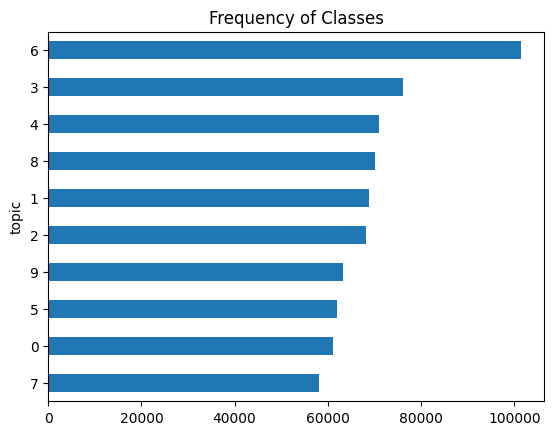

In [33]:
import matplotlib.pyplot as plt

data_copy["topic"].value_counts(ascending=True).plot.barh()

plt.title("Frequency of Classes")
plt.show()
